In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
df= pd.read_csv("C:\\Users\\Anshul\\Documents\\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,sex,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,13270.422265
std,14.049960,0.500160,6.098187,1.205493,12110.011237
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,63770.428010


In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
df.replace({'region':{'southeast':0, 'southwest':1,'northwest':2,'northeast':3}}, inplace=True)

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,1,16884.92400
1,18,0,33.770,1,no,0,1725.55230
2,28,0,33.000,3,no,0,4449.46200
3,33,0,22.705,0,no,2,21984.47061
4,32,0,28.880,0,no,2,3866.85520


In [13]:
df.describe()

,age,sex,bmi,children,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,3.000000,63770.428010


C:\Users\Anshul\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


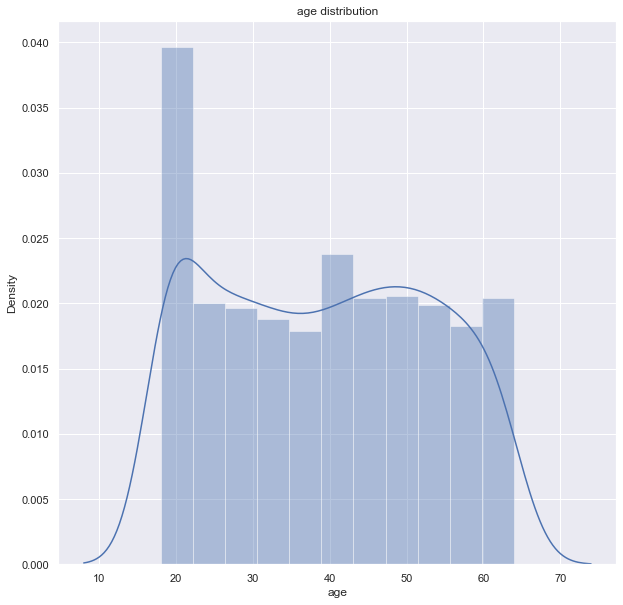

In [14]:
sns.set()
plt.figure(figsize=(10,10))
sns.distplot(df['age'])
plt.title('age distribution')
plt.show()

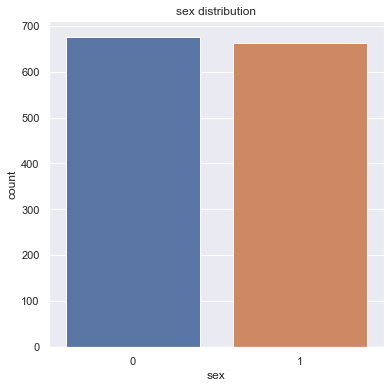

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data= df)
plt.title('sex distribution')
plt.show()

In [16]:
df['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

C:\Users\Anshul\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


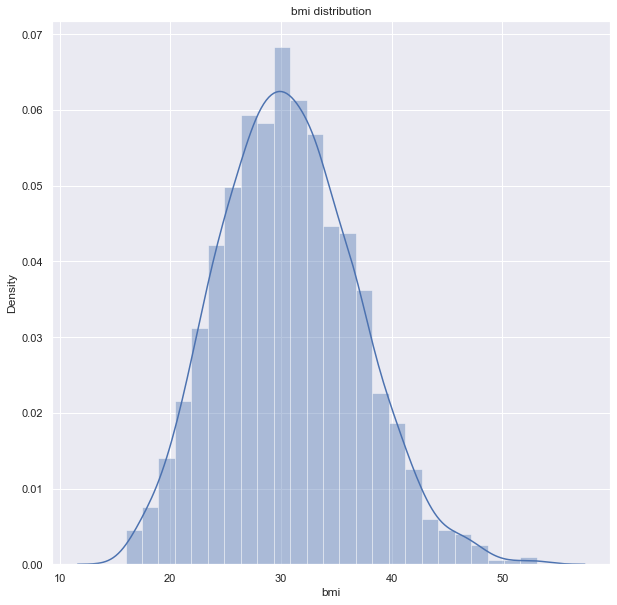

In [17]:
plt.figure(figsize=(10,10))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

C:\Users\Anshul\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


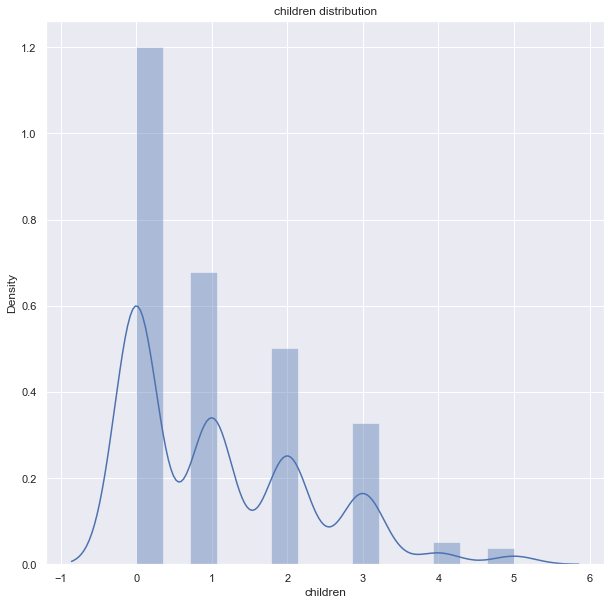

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(df['children'])
plt.title('children distribution')
plt.show()

C:\Users\Anshul\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


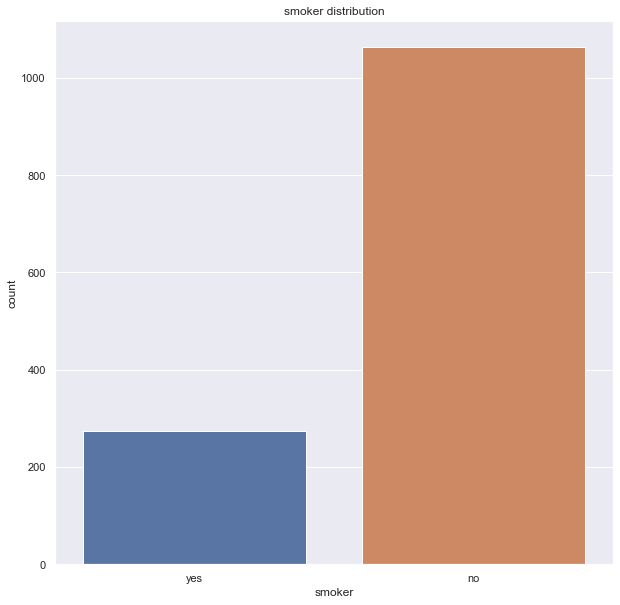

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(df['smoker'], data= df)
plt.title('smoker distribution')
plt.show()

C:\Users\Anshul\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


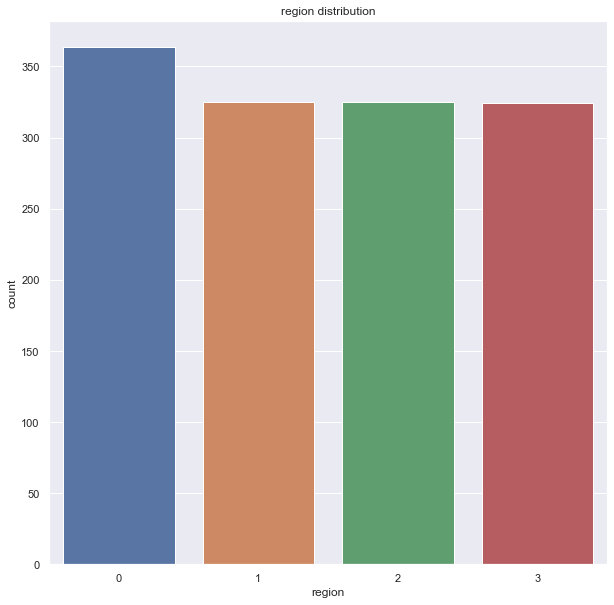

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(df['region'], data= df)
plt.title('region distribution')
plt.show()

C:\Users\Anshul\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


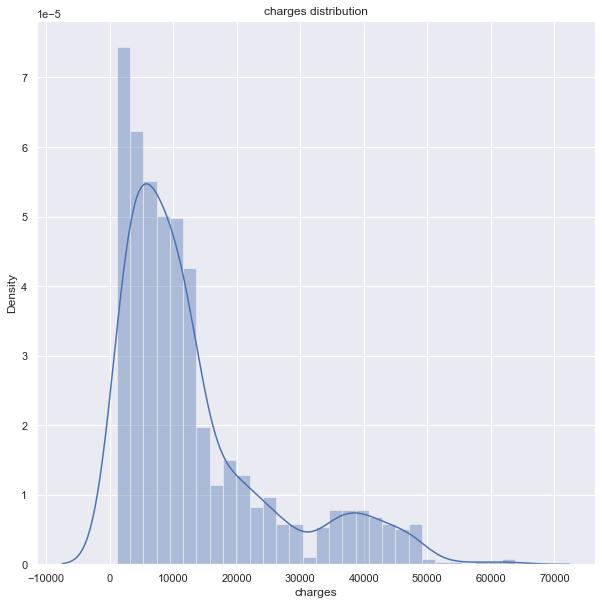

In [21]:
plt.figure(figsize=(10,10))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

In [22]:
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [25]:
x= df.drop(columns='charges', axis=1)
y= df['charges']

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=48)

In [27]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# evaluation our model

In [31]:
pred= model.predict(x_test)
err= metrics.r2_score(y_test, pred)
print('R-Squared score of our model : ', err)

R-Squared score of our model :  0.7539731703543059


# building a predictive model

In [32]:
input= (31,1,25.74,0,1,0)
data= np.asarray(input)
data= data.reshape(1,-1)

In [34]:
pred2= model.predict(data)
print('Predicted score of our model : ', pred2)

Predicted score of our model :  [3653.60414356]


C:\Users\Anshul\anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
